In [2]:
#importing library for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn




In [8]:
# Reading data from loan.csv
loan_data = pd.read_csv('loan.csv',low_memory=False)
loan_data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Cleanning values
loan_data['term']=loan_data['term'].str.replace(' months','')
loan_data.dropna(axis=1,how= 'all', inplace=True)
loan_data.dropna(axis=0,thresh=2, inplace=True)
loan_data.fillna(0,inplace=True)
loan_data['emp_length']=loan_data['emp_length'].str.replace(' years','')
loan_data['emp_length']=loan_data['emp_length'].str.replace(' year','')
loan_data['emp_length']=loan_data['emp_length'].str.replace('+','',regex=False)
loan_data['emp_length']=loan_data['emp_length'].str.replace('<','')
loan_data['emp_length']=loan_data['emp_length'].str.replace('>','',)
loan_data=loan_data.sort_values(by=['term','emp_length'],ascending=True)






In [5]:
#Filter and renaming data as per requirement
loan_data.rename({'title':'purpose'},axis=1)
loan_data.drop("id",axis=1, inplace=True)
loan_data.drop("member_id",axis=1, inplace=True)
loan_data.drop("collections_12_mths_ex_med",axis=1, inplace=True)


AxesSubplot(0.125,0.125;0.775x0.755)


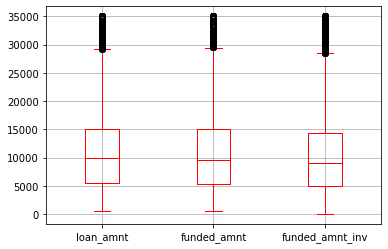

In [9]:
plot1=loan_data.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt_inv'],color='red') 
print(plot1)

In [ ]:
#Observation shows that funded ammount,loan_ammount_inv are evenly distributed i.e every person almost get requested ammount of loan 

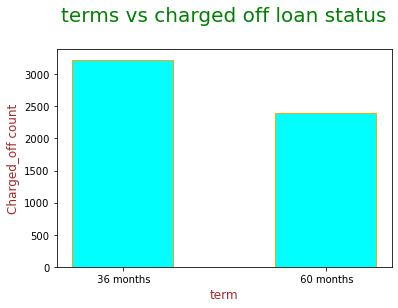

In [85]:
loan_term=loan_data[loan_data.loan_status=='Charged Off']
loan_term=loan_term[['term','loan_status']]
loan_term_count=loan_term.groupby('term').count()

plt.bar(loan_term_count.index,loan_term_count.loan_status,width= 0.5, align='center', edgecolor='Orange',color='cyan')
plt.title("Terms vs charged off loan status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.ylabel("Charged_off count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()


In [ ]:
##Observation: 36 month term are most likely to deafult compare to 60 month loan

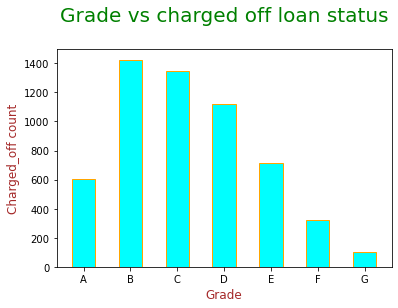

In [118]:
loan_grade=loan_data[['grade','loan_status']]
loan_grade=loan_grade[loan_grade.loan_status=='Charged Off']
loan_grade_Count=loan_grade.groupby(['grade']).count()
plt.bar(loan_grade_Count.index,loan_grade_Count.loan_status,width= 0.5, align='center', edgecolor='Orange',color='cyan')
plt.title("Grade vs charged off loan status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.ylabel("Charged_off count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()



In [ ]:
#Observation shows less changes of loan default from grade B to G


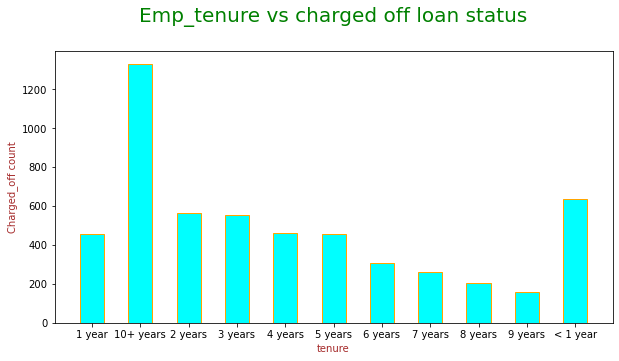

In [132]:
loan_emp_length=loan_data[loan_data.loan_status=='Charged Off']
loan_emp_length=loan_emp_length[['loan_status','emp_length']].groupby('emp_length').count()
fig = plt.figure(figsize = (10, 5))
plt.bar(loan_emp_length.index,loan_emp_length.loan_status,width= 0.5, align='center', edgecolor='Orange',color='cyan')
plt.title("Emp_tenure vs charged off loan status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.ylabel("Charged_off count", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("tenure", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [133]:
Charged_off_loan=loan_data[loan_data.loan_status=='Charged Off']

In [136]:
home_ownership_count=Charged_off_loan[['loan_status','home_ownership']].groupby('home_ownership').count()

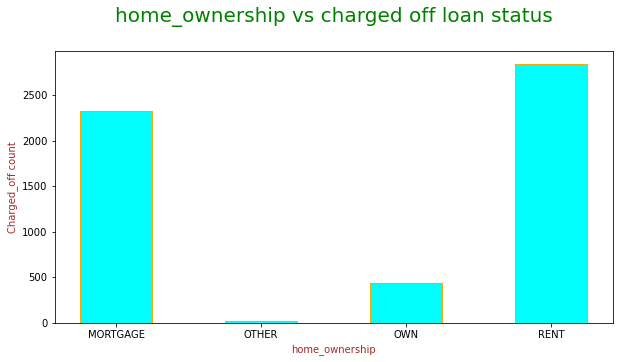

In [141]:
home_ownership_count
fig = plt.figure(figsize = (10, 5))
plt.bar(home_ownership_count.index,home_ownership_count.loan_status,width= 0.5, align='center', edgecolor='Orange',color='cyan')
plt.title("home_ownership vs charged off loan status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.ylabel("Charged_off count", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("home_ownership", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()



In [168]:
#maaximum person are likely to default who leave on Rent


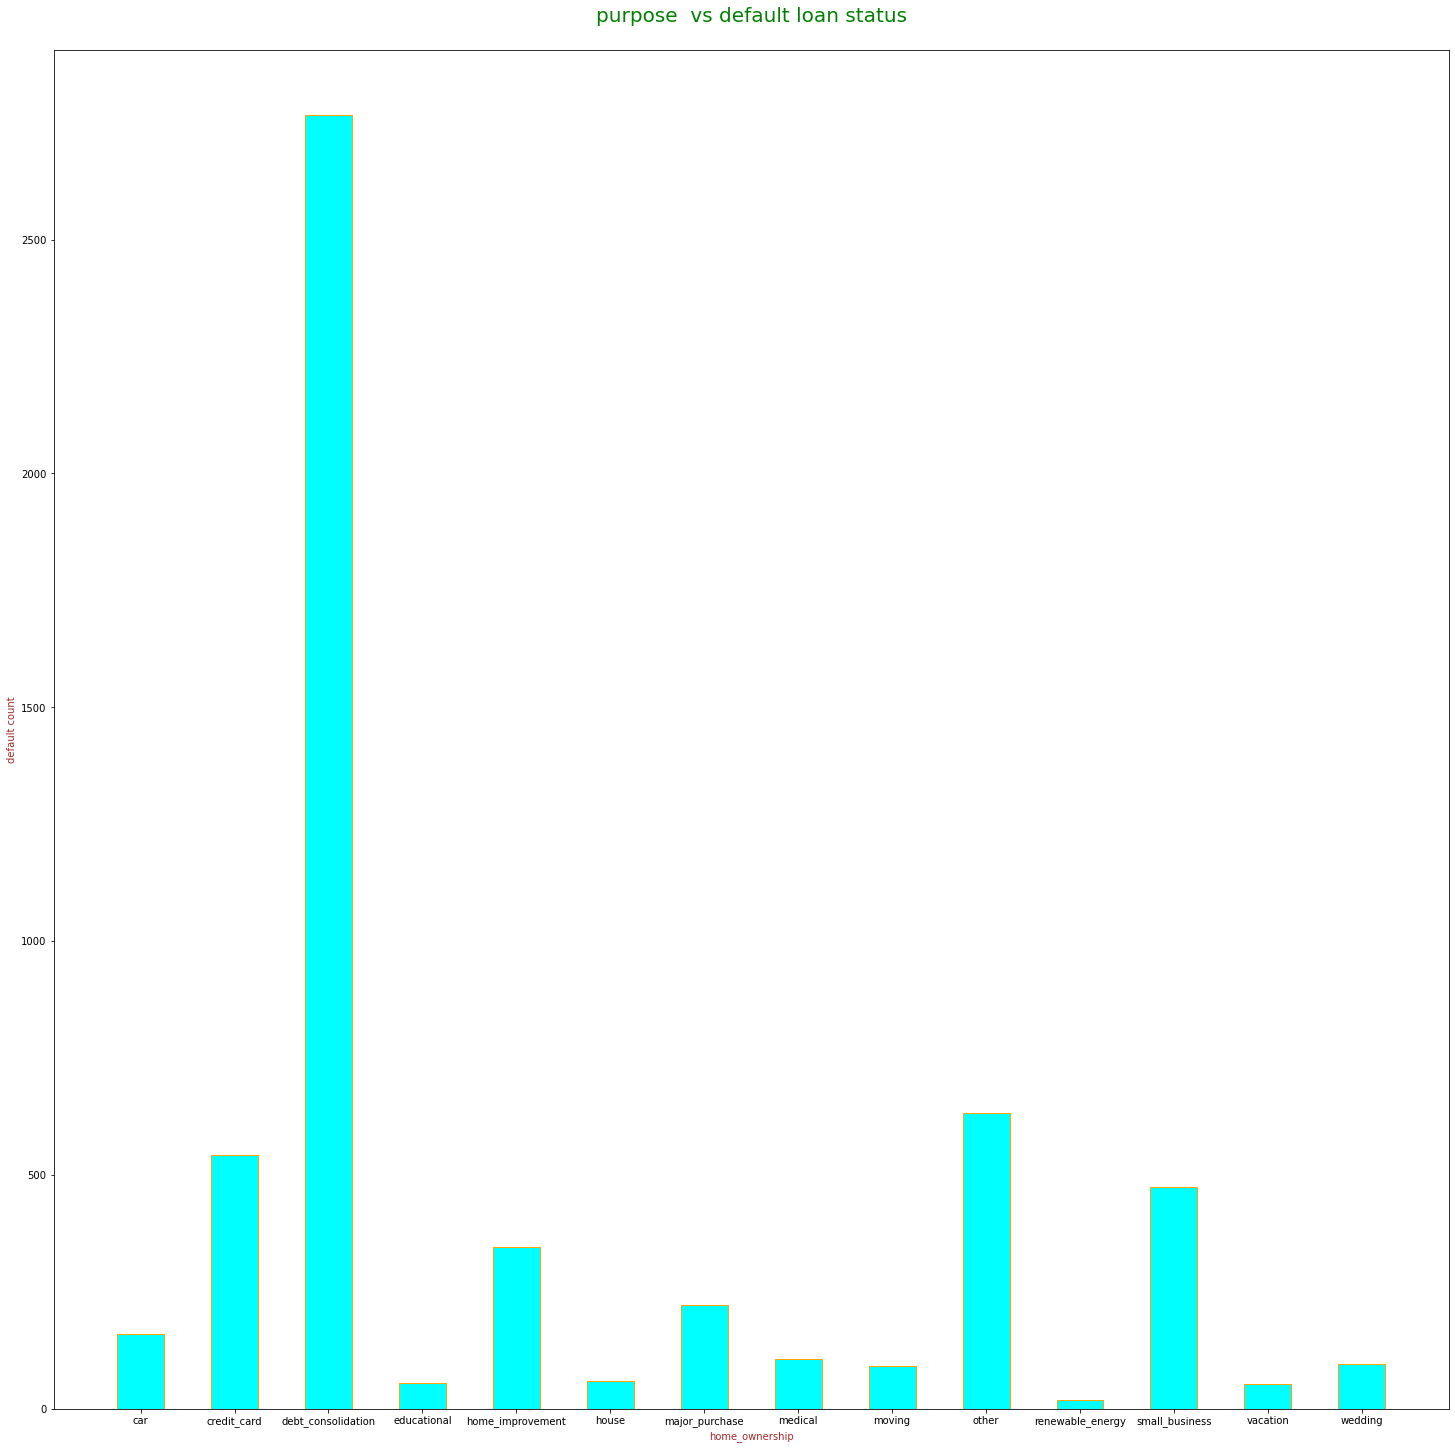

In [184]:
loan_purpose_count=Charged_off_loan[['loan_status','purpose']].groupby('purpose').count()
fig = plt.figure(figsize = (25, 25))
plt.bar(loan_purpose_count.index,loan_purpose_count.loan_status,width= 0.5, align='center', edgecolor='Orange',color='cyan')
plt.title("purpose  vs default loan status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
# Labeling Axes
plt.ylabel("default count", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("home_ownership", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [ ]:
#debt_consolidation is most likely to defaulted loan and renewable_energy is less likely to deafult